# Analysis of Malaria dataset

**Author:** Chu Ting Hine Simon <br>
**E-mail:** simonchuth@gmail.com <br>

Malaria is a life-threatening disease caused by a mosquito-borne parasites. When malaria enters the blood stream of the patient via a mosquito bite, the parasite then travel to the liver, where it proliferate in the host liver cell. Eventually the host liver cells rupture, and the parasites were released to the blood stream to infect other liver cells or red blood cells. <br>

Malaria could cause the death of the patient due to complications, such as:
* Anemia: As the parasite reproduce in the red blood cells, it cause red blood cells to rupture as it proliferate. This cause the red blood cells counts to decrease, eventuallyleading to anemia (lack of healthy red blood cells to carry oxygen).
* Organ failure: The parasite might also reproduce in the liver or spleen, causing damages to these organ as they multiply, leading to failure of these organ.
* Cerebral malaria: Parasite filled blood could blockage and damages blood vessel leading to the brain, thus decresaing oxygen and nutrient supply to the brain. This could lead to seizures, coma, or even death. 

In [1]:
# Installation of required packages (If not packages were not available)
! pip install numpy
! pip install pandas
! pip install matplotlib
! pip install seaborn

In [2]:
import sqlite3

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

## Import data into pandas dataframe

In [3]:
malaria_deaths_path = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-13/malaria_deaths.csv'
malaria_deaths_age_path = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-13/malaria_deaths_age.csv'
malaria_inc_path = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-13/malaria_inc.csv'

In [4]:
malaria_deaths_df = pd.read_csv(malaria_deaths_path)
malaria_deaths_age_df = pd.read_csv(malaria_deaths_age_path, index_col=0)
malaria_inc_df = pd.read_csv(malaria_inc_path)

print('Original Column Headings')
print(f'malaria_deaths_df columns: {list(malaria_deaths_df.columns)}')
print(f'malaria_deaths_age_df columns: {list(malaria_deaths_age_df.columns)}')
print(f'malaria_inc_df columns: {list(malaria_inc_df.columns)}')

malaria_deaths_df.columns = ['entity', 'code', 'year', 'deaths']
malaria_inc_df.columns = ['entity', 'code', 'year', 'incidence']

print('\nNew Column Headings')
print(f'malaria_deaths_df columns: {list(malaria_deaths_df.columns)}')
print(f'malaria_deaths_age_df columns: {list(malaria_deaths_age_df.columns)}')
print(f'malaria_inc_df columns: {list(malaria_inc_df.columns)}')


Original Column Headings
malaria_deaths_df columns: ['Entity', 'Code', 'Year', 'Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)']
malaria_deaths_age_df columns: ['entity', 'code', 'year', 'age_group', 'deaths']
malaria_inc_df columns: ['Entity', 'Code', 'Year', 'Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)']

New Column Headings
malaria_deaths_df columns: ['entity', 'code', 'year', 'deaths']
malaria_deaths_age_df columns: ['entity', 'code', 'year', 'age_group', 'deaths']
malaria_inc_df columns: ['entity', 'code', 'year', 'incidence']


## Basic Inspection of the dataset

### Inspect head of dataframe

In [5]:
print('malaria_deaths_df')
malaria_deaths_df.head()

malaria_deaths_df


,entity,code,year,deaths
0,Afghanistan,AFG,1990,6.802930
1,Afghanistan,AFG,1991,6.973494
2,Afghanistan,AFG,1992,6.989882
3,Afghanistan,AFG,1993,7.088983
4,Afghanistan,AFG,1994,7.392472


In [6]:
print('malaria_deaths_age_df')
malaria_deaths_age_df.head()

malaria_deaths_age_df


,entity,code,year,age_group,deaths
1,Afghanistan,AFG,1990,Under 5,184.606435
2,Afghanistan,AFG,1991,Under 5,191.658193
3,Afghanistan,AFG,1992,Under 5,197.140197
4,Afghanistan,AFG,1993,Under 5,207.357753
5,Afghanistan,AFG,1994,Under 5,226.209363


In [7]:
print('malaria_inc_df')
malaria_inc_df.head()

malaria_inc_df


,entity,code,year,incidence
0,Afghanistan,AFG,2000,107.100000
1,Afghanistan,AFG,2005,46.500000
2,Afghanistan,AFG,2010,23.900000
3,Afghanistan,AFG,2015,23.600000
4,Algeria,DZA,2000,0.037746


### Identify missing data in the dataset

In [8]:
malaria_deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6156 entries, 0 to 6155
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   entity  6156 non-null   object 
 1   code    5292 non-null   object 
 2   year    6156 non-null   int64  
 3   deaths  6156 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 192.5+ KB


In [9]:
malaria_deaths_age_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30780 entries, 1 to 30780
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   entity     30780 non-null  object 
 1   code       26460 non-null  object 
 2   year       30780 non-null  int64  
 3   age_group  30780 non-null  object 
 4   deaths     30780 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.4+ MB


In [10]:
malaria_inc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   entity     508 non-null    object 
 1   code       400 non-null    object 
 2   year       508 non-null    int64  
 3   incidence  508 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 16.0+ KB


While there were no missing data for most columns, there are missing data for the `code` column for all 3 dataframe.

#### Inspect entities that have missing code

In [11]:
def print_entity_with_missing_code(df):
    """
    Print the list of entity that have missing code in the dataframe
    """
    unique_entity = df[['entity', 'code']].drop_duplicates()
    unique_entity_missing_code = unique_entity[unique_entity.code.isnull()]
    print(unique_entity_missing_code)

In [12]:
print('Entity with missing code for malaria_deaths_df')
print_entity_with_missing_code(malaria_deaths_df)

print('\nEntity with missing code for malaria_deaths_age_df')
print_entity_with_missing_code(malaria_deaths_age_df)

print('\nEntity with missing code for malaria_inc_df')
print_entity_with_missing_code(malaria_inc_df)

Entity with missing code for malaria_deaths_df
                            entity code
108           Andean Latin America  NaN
270                    Australasia  NaN
972                      Caribbean  NaN
1026                  Central Asia  NaN
1053                Central Europe  NaN
1080         Central Latin America  NaN
1107    Central Sub-Saharan Africa  NaN
1593                     East Asia  NaN
1620                Eastern Europe  NaN
1647    Eastern Sub-Saharan Africa  NaN
1755                       England  NaN
2349                      High SDI  NaN
2376      High-income Asia Pacific  NaN
2403               High-middle SDI  NaN
2943   Latin America and Caribbean  NaN
3132                       Low SDI  NaN
3159                Low-middle SDI  NaN
3537                    Middle SDI  NaN
3915  North Africa and Middle East  NaN
3942                 North America  NaN
3996              Northern Ireland  NaN
4077                       Oceania  NaN
4644                      Scotlan

`code` are country code of the respective countries. Some entities exist without `code` becuase they are non-country entities, such as geographical regions, cities, economic status. These information might provide insights later during visualisation, thus they are being kept for now.

### Sanity checks on data

In [13]:
malaria_deaths_df.describe()

,year,deaths
count,6156.000000,6156.000000
mean,2003.000000,16.375074
std,7.789514,38.606219
min,1990.000000,0.000000
25%,1996.000000,0.000000
50%,2003.000000,0.020219
75%,2010.000000,3.891035
max,2016.000000,229.228881


In [14]:
malaria_deaths_age_df.describe()

,year,deaths
count,30780.000000,30780.000000
mean,2003.000000,3698.550438
std,7.789007,33539.059413
min,1990.000000,0.000000
25%,1996.000000,0.000000
50%,2003.000000,0.123451
75%,2010.000000,80.505605
max,2016.000000,752025.548675


For `malaria_deaths_df`, `deaths` is the death rate per 100,000 people. In the original dataset, there were not elaborate description about `deaths` for `malaria_deaths_age_df`. The values for `deaths` in `malaria_deaths_age_df` are generally higher than `malaria_deaths_df`. In addition, the maximum value of `deaths` for `malaria_deaths_age_df` is `752,025`. Hence, it is unlikely that `deaths` in `malaria_deaths_age_df` is also death rate per 100,000 people.

In [15]:
malaria_inc_df.describe()

,year,incidence
count,508.00000,508.000000
mean,2007.50000,141.714565
std,5.59568,176.637900
min,2000.00000,0.000000
25%,2003.75000,6.986310
50%,2007.50000,57.050000
75%,2011.25000,246.050000
max,2015.00000,1741.000000


`incidence` for `malaria_inc_df` suppose to refer to the rate of incidence per 1000 population. Hence, it is not logical for the maximum value for `incidence` to be 1741 (larger than 1000).

**Note:** The time period for `malaria_deaths_df` and `malaria_deaths_age_df` are from 1990 to 2016. However, the time period for `malaria_inc_df` is only from 2000 to 2015. So it will be impossible to do correlation between death and incidence of malaria outside the period 2000 to 2015.

In [16]:
malaria_inc_df[malaria_inc_df['incidence'] > 1000]

,entity,code,year,incidence
464,Turkey,TUR,2000,1741.0


There is only 1 instance of `incidence` (rate of incidence per 1000 population) above 1000, thus it is likely that this is due to an error in the data. This error was made for the `Turkey`.

In [17]:
malaria_inc_df[malaria_inc_df['entity'] == 'Turkey']

,entity,code,year,incidence
464,Turkey,TUR,2000,1741.0
465,Turkey,TUR,2005,295.8
466,Turkey,TUR,2010,0.0
467,Turkey,TUR,2015,0.0


Online articles reported that the number of malaria case in Turkey drop significantly during the period of 2000 to 2015, which was also reflected in the data. 

In [18]:
# Incidence of malaria in turkey in 2000 was corrected to 1000 (the maximum logical value for `incidence`)
malaria_inc_df.iloc[464,3] = 1000
malaria_inc_df[malaria_inc_df['entity'] == 'Turkey']

,entity,code,year,incidence
464,Turkey,TUR,2000,1000.0
465,Turkey,TUR,2005,295.8
466,Turkey,TUR,2010,0.0
467,Turkey,TUR,2015,0.0


In [19]:
# Updating columns title for malaria_deaths_df from `deaths` to `deaths_rate_per_100k`. 
# This is to provide better clarity, and avoid confusion with `deaths` in malaria_deaths_age_df
malaria_deaths_df.columns = ['entity', 'code', 'year', 'deaths_rate_per_100k']

## Export data to SQL database

In [20]:
db_path = 'malaria.db'

sqlite3_con = sqlite3.connect(db_path)
malaria_deaths_df.to_sql('malaria_deaths', con=sqlite3_con, index=False, if_exists="replace")
malaria_deaths_age_df.to_sql('malaria_deaths_age', con=sqlite3_con, index=False, if_exists="replace")
malaria_inc_df.to_sql('malaria_inc', con=sqlite3_con, index=False, if_exists="replace")
sqlite3_con.commit()
sqlite3_con.close()

## Retrieve data from SQL database

In [21]:
def check_sql(sql):
    """
    Check if the SQL query is of type str, and it contains at least SELECT and FROM.
    """
    if not isinstance(sql, str):
        raise TypeError(f'SQL query need to be in str, but {type(sql)} was provided')
    
    sql = sql.lower()
    if 'select' not in sql:
        raise ValueError('SQL query must at least contain "SELECT"')
    
    if 'from' not in sql:
        raise ValueError('SQL query must at least contain "FROM"')


def sql_to_pandas(sql, db_path='malaria.db', sort_order=['year', 'code', 'entity']):
    """
    Takes in an sql query, and return the result as a pandas.DataFrame
    """
    check_sql(sql)
    
    sqlite3_con = sqlite3.connect(db_path)
    
    result_df = pd.read_sql(sql, con=sqlite3_con)
    
    sqlite3_con.close()
    
    for col in sort_order:
        if col not in result_df.columns:
            sort_order.remove(col)
            
    result_df.sort_values(by=sort_order, inplace=True)
    
    return result_df

## Visualisation 1

As the number of cases of malaria (incidence rate) increases, it will put more strain on the healthcare system, resulting in 
a corresponding raise in the death rate of malaria. However, with global effort in place to tackle malaria, such as the [WHO Global Malaria Programme](https://www.who.int/malaria/about_us/en/), the incidence and death rate of malaria would ideally be on a declining trend. <br>

Objective: To investigate if the incidence rate of malaria correlates with its deaths rate, and how does this correlation change as across different years.

In [22]:
result_df_1 = sql_to_pandas('SELECT malaria_deaths.entity, \
                             malaria_deaths.year, \
                             malaria_deaths.deaths_rate_per_100k, \
                             malaria_inc.incidence \
                             FROM malaria_deaths \
                             INNER JOIN malaria_inc \
                             ON malaria_deaths.entity = malaria_inc.entity \
                             AND malaria_deaths.year = malaria_inc.year \
                             WHERE \
                             malaria_deaths.code IS NOT NULL \
                             AND malaria_deaths.entity!="World"')
result_df_1

,entity,year,deaths_rate_per_100k,incidence
0,Afghanistan,2000,7.939949,107.100000
4,Algeria,2000,0.026530,0.037746
8,Angola,2000,32.045192,315.600000
12,Argentina,2000,0.016102,2.500000
16,Azerbaijan,2000,0.023048,17.900000
...,...,...,...,...
379,Venezuela,2015,0.066374,68.400000
383,Vietnam,2015,1.248534,0.300000
387,Yemen,2015,0.033254,22.200000
391,Zambia,2015,30.273699,173.700000


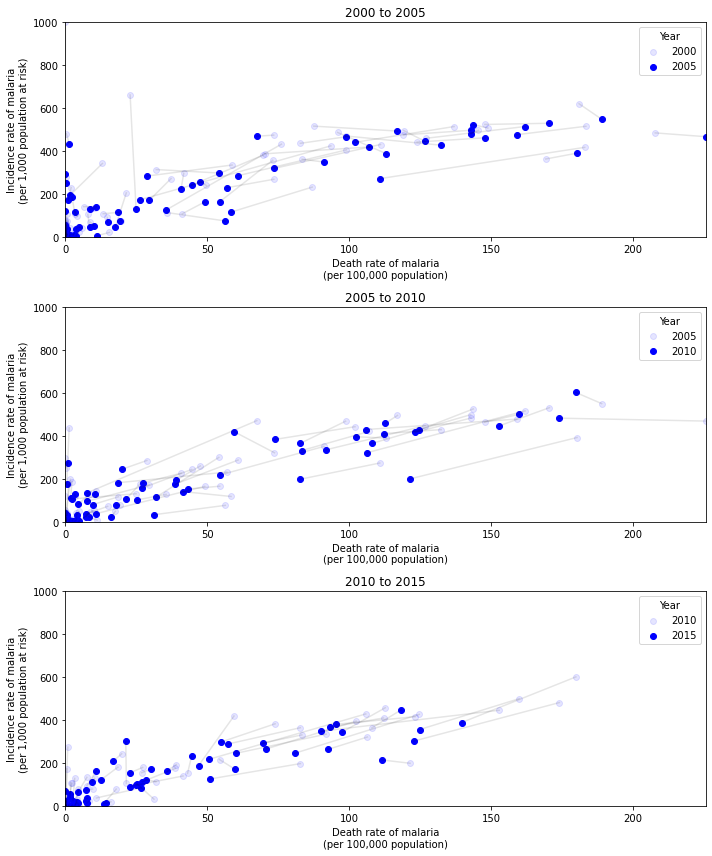

In [23]:
max_deaths_rate = result_df_1.deaths_rate_per_100k.max()
min_deaths_rate = result_df_1.deaths_rate_per_100k.min()
max_incidence = result_df_1.incidence.max()
min_incidence = result_df_1.incidence.min()

list_unique_year = result_df_1.year.unique()
num_unique_year = len(list_unique_year)

list_unique_entity = result_df_1.entity.unique()

plt.figure(figsize=(10, num_unique_year * 3))

for i, curr_year in enumerate(list_unique_year):
    if i == 0:
        continue
        
    prev_year = list_unique_year[i - 1]
    
    curr_year_df = result_df_1[result_df_1.year==curr_year]
    prev_year_df = result_df_1[result_df_1.year==prev_year]
    
    plt.subplot(num_unique_year - 1, 1, i)
    
    plt.scatter(prev_year_df.deaths_rate_per_100k, prev_year_df.incidence, c='blue', alpha=0.1, label=prev_year)
    plt.scatter(curr_year_df.deaths_rate_per_100k, curr_year_df.incidence, c='blue', label=curr_year)
    
    # Drawing lines to connect paired data points (from the same country)
    for unique_entity in list_unique_entity:
        x = [prev_year_df[prev_year_df.entity==unique_entity].deaths_rate_per_100k, 
             curr_year_df[curr_year_df.entity==unique_entity].deaths_rate_per_100k]
        y = [prev_year_df[prev_year_df.entity==unique_entity].incidence, 
             curr_year_df[curr_year_df.entity==unique_entity].incidence]
        plt.plot(x, y, c='k', alpha=0.1)
    
    plt.ylim((min_incidence, max_incidence))
    plt.xlim((min_deaths_rate, max_deaths_rate))
    plt.title(f'{prev_year} to {curr_year}')
    plt.ylabel('Incidence rate of malaria\n(per 1,000 population at risk)')
    plt.xlabel('Death rate of malaria\n(per 100,000 population)')
    plt.legend(title='Year')
    
plt.tight_layout()
plt.show()

The 3 subplots shows the how the malaria incidence rate (y-axis) and death rate (x-axis) changed from 2000 to 2015 (each subplot in 5-years interval). The points in `light blue` denotes the datapoints from the earlier reference year (e.g. 2000), and the points in `dark blue` denotes the datapoints from 5 years later (e.g. 2005). The `lines` connecting 2 points (reference year, 5 years later) denote that the pair of points are from the same country. Hence, the subplots shows how the malaria incidence rate and death rate of a country changes within a 5-years timeframe. <br>

As expected, there is a positive correlation between the incidence rate and death rate of malaria. As the incidence rate of malaria increases, the death rate of malaria also increases. It was also worth noting that for most countries, the incidences rate and death rate of malaria drop across the years, which might indicates that efforts in tackling malaria are effective. 

## Visualisation 2

According to the WHO [fact sheet on malaria](https://www.who.int/news-room/fact-sheets/detail/malaria#:~:text=Children%20under%205%20years%20of%20age%20are%20the%20most%20vulnerable,of%20all%20malaria%20deaths%20worldwide.), children under 5 years of age were known to be the most vulnerable group affected by malaria. The immune system of children under the age of 5 were still developing, which might explain why children are more vulnerable to malaria. As they grow older, previous exposure to malaria trained their adaptive immune system to defend against subsequent exposure to malaria, thus improving their prognosis. <br>

Objective: To investigate how the mortality of malaria changes in age group.

In [24]:
result_df_2 = sql_to_pandas('SELECT entity, age_group, deaths \
                             FROM malaria_deaths_age \
                             WHERE \
                             code IS NOT NULL \
                             AND entity!="World"')
result_df_2

,entity,age_group,deaths
0,Afghanistan,Under 5,184.606435
21085,Afghanistan,50-69,185.333974
21086,Afghanistan,50-69,188.921260
10556,Afghanistan,5-14,186.455122
10555,Afghanistan,5-14,182.793081
...,...,...,...
10524,Zimbabwe,70 or older,73.539031
10525,Zimbabwe,70 or older,71.427930
10526,Zimbabwe,70 or older,70.006725
10515,Zimbabwe,70 or older,65.466083


In [25]:
# highlight data points from Nigeria and Democratic Republic of Congo
result_df_2['highlight_entity'] = result_df_2['entity'].apply(lambda x: x if (x=='Nigeria')
                                                                          or (x=='Democratic Republic of Congo')
                                                                          else 'Other countries')

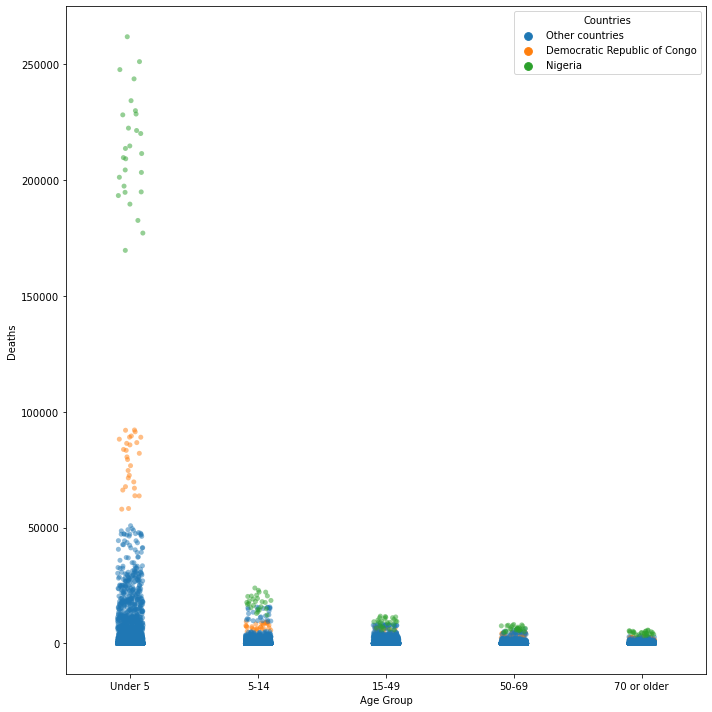

In [26]:
age_grp_order =['Under 5', '5-14', '15-49', '50-69', '70 or older']

plt.figure(figsize=(10, 10))
sns.stripplot(x='age_group', y='deaths', hue='highlight_entity', data=result_df_2, order=age_grp_order, alpha=0.5)
plt.ylabel('Deaths')
plt.xlabel('Age Group')
plt.legend(title='Countries')
plt.tight_layout()
plt.show()

This graph show the `deaths` (presumably the malaria death rate) in different age groups. Aligned with current knowledge, children under the age of 5 had the highest death rate. The death rate decreases as age increases, presumably due to improved immune response against malaria. It was also worth noting that `Nigeria` was the most badly affected country, and `Democratic Republic of Congo` was the second most badly affected country. Both countries have the highest death rate for children under the age of 5. For the other age groups, the death rates for `Nigeria` and `Democratic Republic of Congo` were also consistently higher than the other countries. <br>

**Caveat:** `Deaths` was not properly defined in the raw data, it was assumed to be the death rate. The raw data have been group by the different age group, but it was not known if the `deaths` was normalised to the population for the respective age group. It was surprising the `70 or older` have a lower `deaths` than the age group `15-49`. The immune system of an individual above 70 should start to deteriorate, and the `deaths` (if it is death rate and it was normalized to the population of the respective age group) would be higher than age group `15-49`. Hence, it might be possible that the low `deaths` in `70 or older` could be due to a smaller population of people in this age group. 

## Visualisation 3

Developed countries with stronger economy generally will be able to afford a better healthcare system. Therefore malaria patients from these developed countries should be able to receive better care, and have a better prognosis. The Human Development Index (HDI) is a summary measure of average achievement in various important dimensions of human development, thus it could be a good approximate of how developed the country is. The HDI (year 2018) of most countries found in the dataset could be found from the [Human Development Reports of the United Nations Development Programme](http://hdr.undp.org/en/composite/HDI). The data was extracted and preprocessed into csv format, which was upload into this [GitHub repo](https://github.com/simonchuth/sgh_assessment/blob/master/country_hdi.csv). <br>

Objective: To investigate if patient from more developed countries (higher HDI) have a better prognosis when infected with malaria.

In [27]:
result_df_3 = sql_to_pandas('SELECT \
                             malaria_deaths.entity, \
                             AVG(malaria_deaths.deaths_rate_per_100k) as deaths_rate_per_100k, \
                             AVG(malaria_inc.incidence) as incidence \
                             FROM malaria_deaths \
                             INNER JOIN malaria_inc \
                             ON malaria_deaths.entity = malaria_inc.entity \
                             AND malaria_deaths.year = malaria_inc.year \
                             WHERE \
                             malaria_deaths.code IS NOT NULL \
                             AND malaria_deaths.entity!="World" \
                             GROUP BY malaria_deaths.entity')
result_df_3

,entity,deaths_rate_per_100k,incidence
0,Afghanistan,7.738631,50.275000
1,Algeria,0.024008,0.010736
2,Angola,36.605595,213.325000
3,Argentina,0.010256,1.150000
4,Azerbaijan,0.014474,5.275000
...,...,...,...
94,Venezuela,0.081828,37.625000
95,Vietnam,1.380582,2.125000
96,Yemen,0.038222,50.225000
97,Zambia,42.833839,238.800000


In [28]:
hdi_path = 'https://raw.githubusercontent.com/simonchuth/sgh_assessment/master/country_hdi.csv'
hdi_df = pd.read_csv(hdi_path)

In [29]:
combined_df = result_df_3.merge(hdi_df, left_on='entity', right_on='country')
combined_df.drop(columns='country', inplace=True)
combined_df['death_incidence'] = combined_df.deaths_rate_per_100k / combined_df.incidence 

# ALgeria is an outlier, with a death_incidence of 2.36 and high HDI
combined_df = combined_df[combined_df.death_incidence < 1.5]  

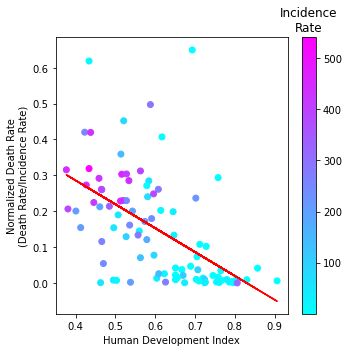

In [30]:
z = np.polyfit(combined_df.hdi, combined_df.death_incidence, 1)
p = np.poly1d(z)

plt.figure(figsize=(5, 5))

plt.scatter(combined_df.hdi, combined_df.death_incidence, c=combined_df.incidence, cmap='cool')
plt.plot(combined_df.hdi, p(combined_df.hdi),'r')
cbar = plt.colorbar()

plt.xlabel('Human Development Index')
plt.ylabel('Normalized Death Rate\n(Death Rate/Incidence Rate)')
cbar.ax.set_title('Incidence\nRate')
plt.tight_layout()
plt.show()

To approximate the prognosis of malaria patient, I have engineered a new feature (Normalized Death Rate) as the `y-axis`, which is the death rate divided by the incidence rate. The intution of this feature is that a high Normalized Death Rate would mean that patient infected with malaria will be more likely to die (worst prognosis), while a lower Normalized Death Rate would mean that patient infected with malaria will more likely to survive (better prognosis). <br>

The `x-axis` of the graph is the Human Development Index (measure of how developed the country is). The colour of the points corresponds to the malaria incidence rate. <br>

This figure is conveying several messages. 
* First, the graph shows that the normalized death rate decreases with higher HDI, suggesting that the prognosis of patient will be better in more developed countries. The red trendline shows a negative correlation between the normalised death rate and the HDI of the country. 
* Second, there are countries with low HDI, yet they have a very low normalized death rate. These countries generally have a low malaria incidence rate, thus their countries healthcare system were still able to provide adequate care to have a good prognosis.  
* Third, it was also worth noting that generally countires with lower HDI also have a higher incidence rate of malaria. This suggests that devloping countries might not have sufficient budget to put in place a adequate programme for the eradication of malaria, thus malaria is still prevalent in these countries.